# Importing Packages and Data

In [1]:
""" 
1. Descriptive Statistics: Begin with basic descriptive statistics for each variable 
(Stock Index, Short Term Yield, and Long Term Yield for both US and UK). This includes:
    Mean: Average value.
    Median: The middle value.
    Mode: The most frequent value.
    Standard Deviation: Measure of the dispersion or spread of the data.
    Minimum and Maximum values.
    Range: The difference between the maximum and minimum.
    Skewness: Measure of the asymmetry of the probability distribution.
    Kurtosis: Measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

2. Time Series Analysis: If your data is a time series (i.e., data points indexed in time order):
    Plot each time series to visually inspect trends, seasonal patterns, and outliers.
    Analyze for stationarity. Non-stationary time series data often need to be transformed, for example, using differencing.
    Autocorrelation and Partial Autocorrelation Analysis to understand the relationship of a variable with its past values.

3. Comparative Analysis: Compare the statistics and time series plots between the US and UK. Look for:
    Correlations between the same variables across countries (e.g., US Stock Index vs. UK Stock Index).
    Correlations between different variables within the same country (e.g., Stock Index vs. Short Term Yield in the US).

4. Yield Curve Analysis: Compare short-term and long-term yields to understand the yield curve for each country, 
    which can be an indicator of economic expectations.
5. Volatility Analysis: Evaluate the volatility in the Stock Index and Yields. This could involve calculating the variance or 
    standard deviation over a rolling window.

6. Event Analysis: Investigate how specific events (like economic announcements, policy changes, etc.) impacted these variables. 
    This could involve a before-and-after analysis for event dates.

7. Regression Analysis: Perform regression analysis to understand the relationship between different variables. For example, 
    how does the Stock Index relate to Short Term and Long Term Yields?

8. Hypothesis Testing: If you have specific hypotheses (e.g., "Short Term Yields are more volatile than Long Term Yields"), 
    you can use statistical tests to validate them.

9. Report Confidence Intervals or Error Margins: When reporting averages or changes, include confidence intervals or error margins to 
    communicate the precision of your estimates.
    
10. Granger Causality Test: To see if one time series can predict another time series. For instance, whether changes in Short Term Yield 
can predict changes in the Stock Index.

"""

' \n1. Descriptive Statistics: Begin with basic descriptive statistics for each variable \n(Stock Index, Short Term Yield, and Long Term Yield for both US and UK). This includes:\n    Mean: Average value.\n    Median: The middle value.\n    Mode: The most frequent value.\n    Standard Deviation: Measure of the dispersion or spread of the data.\n    Minimum and Maximum values.\n    Range: The difference between the maximum and minimum.\n    Skewness: Measure of the asymmetry of the probability distribution.\n    Kurtosis: Measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.\n\n2. Time Series Analysis: If your data is a time series (i.e., data points indexed in time order):\n    Plot each time series to visually inspect trends, seasonal patterns, and outliers.\n    Analyze for stationarity. Non-stationary time series data often need to be transformed, for example, using differencing.\n    Autocorrelation and Partial Autocorrelation Analysis to u

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import scipy 
import statsmodels.api as sm 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime as dt
import yfinance as yf
import os

In [3]:
us_data_path = '/Users/talhajamal/Documents/Documents/Imperial/Courses/Semester 2/Empirical Finance/IndividualProject/coursework_1/Data_coursework_1.xlsx'
us_data = pd.read_excel(us_data_path, sheet_name='US')
us_data['Date'] = pd.to_datetime(us_data['Date'], dayfirst=True)
us_data

,Date,Stock Index,Short-term Yield,Long-term Yield
0,1792-01-31,2.348990,3.956,3.956
1,1792-02-29,2.496140,4.198,4.198
2,1792-03-31,2.297596,4.940,4.940
3,1792-04-30,2.350072,5.143,5.143
4,1792-05-31,2.562141,4.557,4.557
...,...,...,...,...
2780,2023-09-30,4507.660000,5.550,4.590
2781,2023-10-31,4288.050000,5.590,4.880
2782,2023-11-30,4193.800000,5.450,4.370
2783,2023-12-31,4567.800000,5.400,3.880


In [4]:
uk_data_path = '/Users/talhajamal/Documents/Documents/Imperial/Courses/Semester 2/Empirical Finance/IndividualProject/coursework_1/Data_coursework_1.xlsx'
uk_data = pd.read_excel(uk_data_path, sheet_name='UK')
uk_data['Date'] = pd.to_datetime(uk_data['Date'], dayfirst=True)
uk_data

,Date,Stock Index,Short-term Yield,Long-term Yield,FX rate
0,1792-01-31,10.312159,3.820,3.213,4.5290
1,1792-02-29,10.842223,3.800,3.121,4.5620
2,1792-03-31,10.952050,3.790,3.109,4.1169
3,1792-04-30,10.451244,3.790,3.230,4.3215
4,1792-05-31,10.358707,3.800,3.213,4.1615
...,...,...,...,...,...
2780,2023-09-30,4127.240000,5.389,4.447,1.2197
2781,2023-10-31,3954.350000,5.338,4.518,1.2152
2782,2023-11-30,4053.800000,5.323,4.176,1.2622
2783,2023-12-31,4232.010000,5.293,3.539,1.2732


# Question 1

## US Data Visualisation:
1. Rise in Stock Market started around 70s when the Fiat Currency was perhaps introduced. 
2. Meteoric rise in Stock Market over the last 50 years. 

In [5]:
directory = 'Plots'

# Ensure the directory exists
if not os.path.exists(directory):
    os.makedirs(directory)

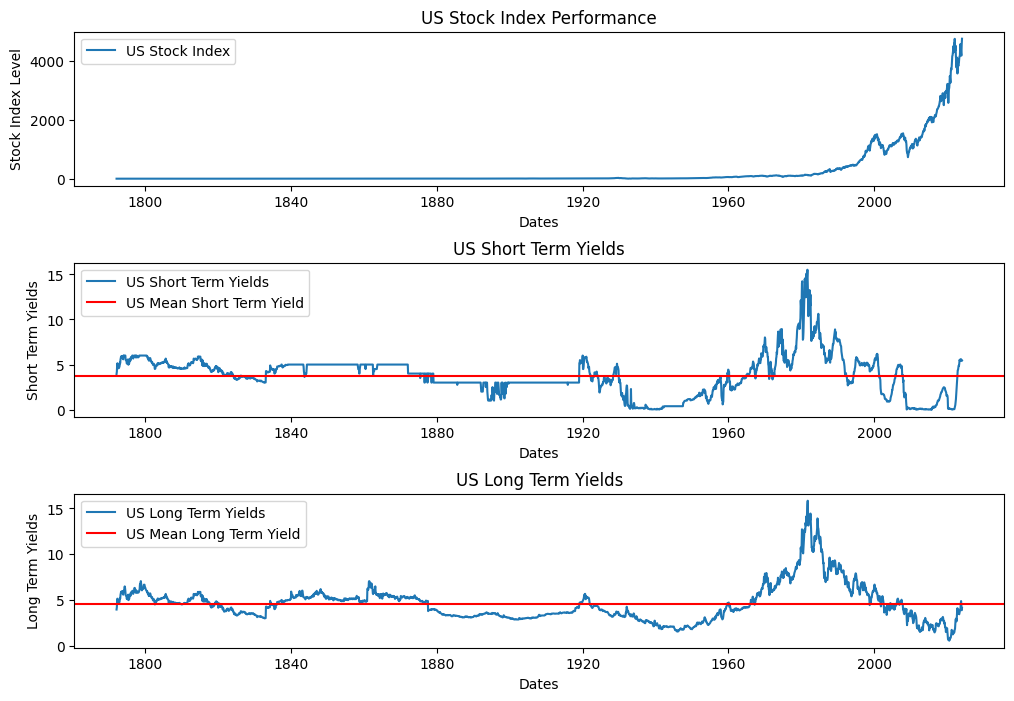

In [6]:
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharey=False, sharex=False)

# Stock Index Performance
axs[0].plot(us_data['Date'], us_data['Stock Index'], label = 'US Stock Index')
axs[0].set_title("US Stock Index Performance")
axs[0].set_xlabel("Dates")
axs[0].set_ylabel("Stock Index Level")
axs[0].legend()

# Short Term Yields
axs[1].plot(us_data['Date'], us_data['Short-term Yield'], label = 'US Short Term Yields')
axs[1].axhline(np.mean(us_data['Short-term Yield']), color='r', label='US Mean Short Term Yield')
axs[1].set_title('US Short Term Yields')
axs[1].set_xlabel('Dates')
axs[1].set_ylabel('Short Term Yields')
axs[1].legend()

# Long Term Yields
axs[2].plot(us_data['Date'], us_data['Long-term Yield'], label = 'US Long Term Yields')
axs[2].axhline(np.mean(us_data['Long-term Yield']), color='r', label='US Mean Long Term Yield')
axs[2].set_title('US Long Term Yields')
axs[2].set_xlabel('Dates')
axs[2].set_ylabel('Long Term Yields')
axs[2].legend()

plt.subplots_adjust(hspace=0.5)

filename = os.path.join(directory, 'us_data.png')
plt.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()



## UK Data Visualization

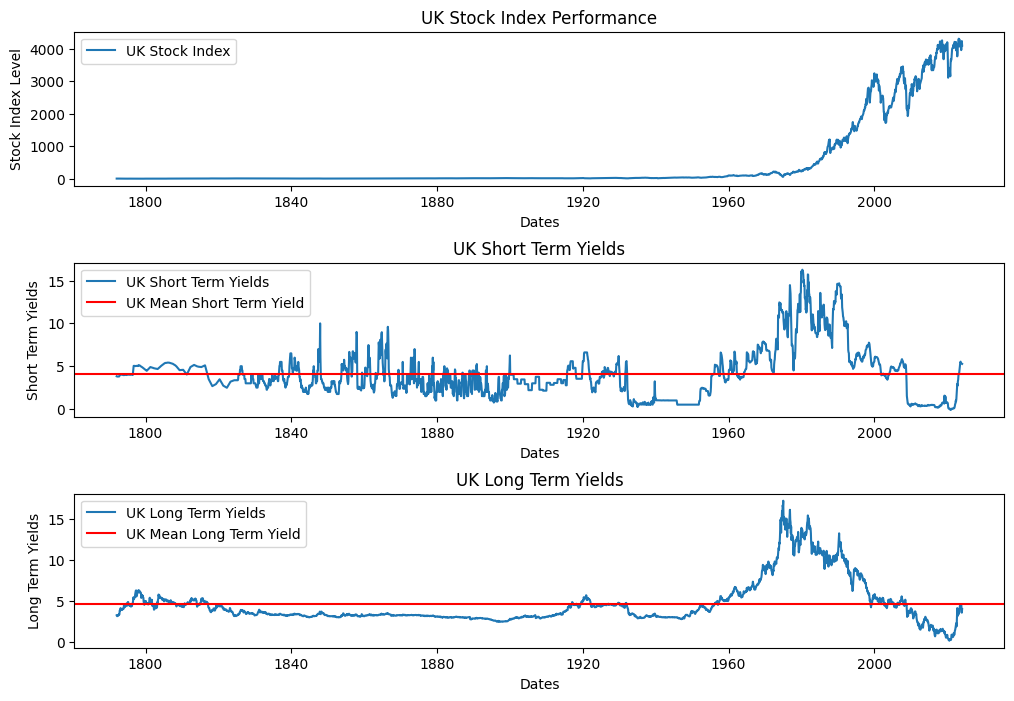

In [7]:
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharey=False, sharex=False) 

# Stock Index Performance
axs[0].plot(uk_data['Date'], uk_data['Stock Index'], label = 'UK Stock Index')
axs[0].set_title("UK Stock Index Performance")
axs[0].set_xlabel("Dates")
axs[0].set_ylabel("Stock Index Level")
axs[0].legend()

# Short Term Yields
axs[1].plot(uk_data['Date'], uk_data['Short-term Yield'], label = 'UK Short Term Yields')
axs[1].axhline(np.mean(uk_data['Short-term Yield']), color='r', label='UK Mean Short Term Yield')
axs[1].set_title('UK Short Term Yields')
axs[1].set_xlabel('Dates')
axs[1].set_ylabel('Short Term Yields')
axs[1].legend()

# Long Term Yields
axs[2].plot(uk_data['Date'], uk_data['Long-term Yield'], label = 'UK Long Term Yields')
axs[2].axhline(np.mean(uk_data['Long-term Yield']), color='r', label='UK Mean Long Term Yield')
axs[2].set_title('UK Long Term Yields')
axs[2].set_xlabel('Dates')
axs[2].set_ylabel('Long Term Yields')
axs[2].legend()

plt.subplots_adjust(hspace=0.5)

filename = os.path.join(directory, 'uk_data.png')
plt.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()

## Combined Visualisation

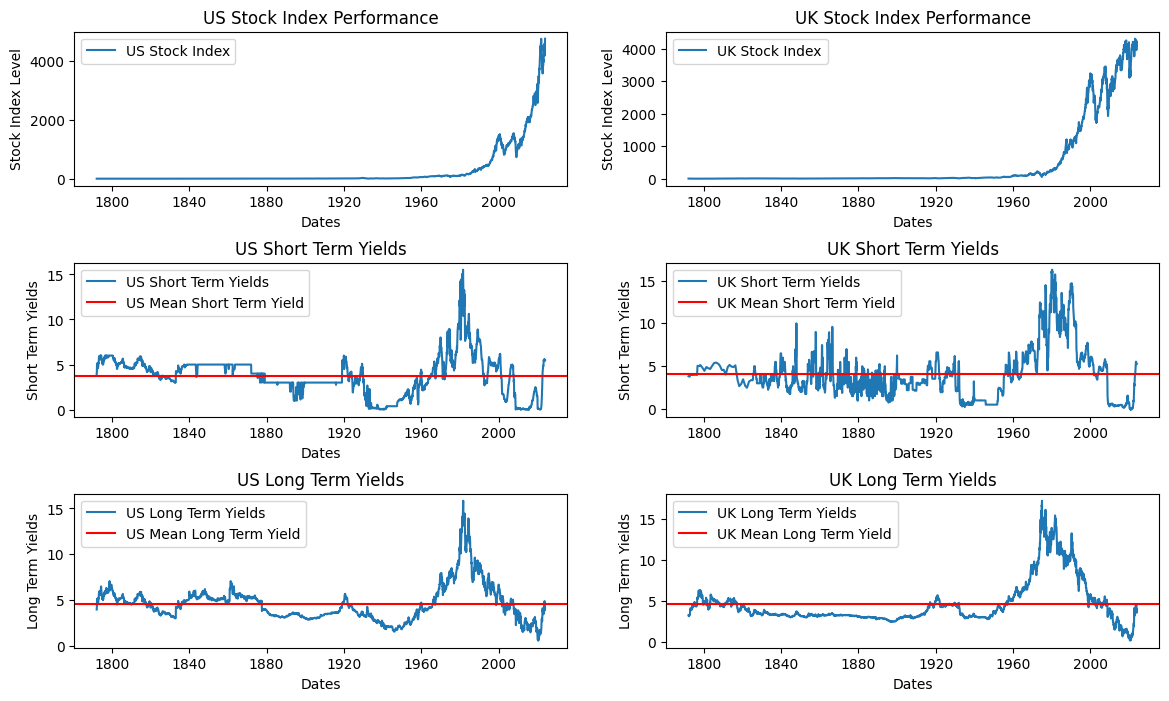

In [8]:
# Combined Visualization
fig, axs = plt.subplots(3, 2, figsize=(14, 8), sharey=False, sharex=False)

# US Data on Left Hand Side
# Stock Index Performance
axs[0, 0].plot(us_data['Date'], us_data['Stock Index'], label = 'US Stock Index')
axs[0, 0].set_title("US Stock Index Performance")
axs[0, 0].set_xlabel("Dates")
axs[0, 0].set_ylabel("Stock Index Level")
axs[0, 0].legend()

# Short Term Yields
axs[1, 0].plot(us_data['Date'], us_data['Short-term Yield'], label = 'US Short Term Yields')
axs[1, 0].axhline(np.mean(us_data['Short-term Yield']), color='r', label='US Mean Short Term Yield')
axs[1, 0].set_title('US Short Term Yields')
axs[1, 0].set_xlabel('Dates')
axs[1, 0].set_ylabel('Short Term Yields')
axs[1, 0].legend()

# Long Term Yields
axs[2, 0].plot(us_data['Date'], us_data['Long-term Yield'], label = 'US Long Term Yields')
axs[2, 0].axhline(np.mean(us_data['Long-term Yield']), color='r', label='US Mean Long Term Yield')
axs[2, 0].set_title('US Long Term Yields')
axs[2, 0].set_xlabel('Dates')
axs[2, 0].set_ylabel('Long Term Yields')
axs[2, 0].legend()

# UK Data on Right Hand Side

# Stock Index Performance
axs[0, 1].plot(uk_data['Date'], uk_data['Stock Index'], label = 'UK Stock Index')
axs[0, 1].set_title("UK Stock Index Performance")
axs[0, 1].set_xlabel("Dates")
axs[0, 1].set_ylabel("Stock Index Level")
axs[0, 1].legend()

# Short Term Yields
axs[1, 1].plot(uk_data['Date'], uk_data['Short-term Yield'], label = 'UK Short Term Yields')
axs[1, 1].axhline(np.mean(uk_data['Short-term Yield']), color='r', label='UK Mean Short Term Yield')
axs[1, 1].set_title('UK Short Term Yields')
axs[1, 1].set_xlabel('Dates')
axs[1, 1].set_ylabel('Short Term Yields')
axs[1, 1].legend()

# Long Term Yields
axs[2, 1].plot(uk_data['Date'], uk_data['Long-term Yield'], label = 'UK Long Term Yields')
axs[2, 1].axhline(np.mean(uk_data['Long-term Yield']), color='r', label='UK Mean Long Term Yield')
axs[2, 1].set_title('UK Long Term Yields')
axs[2, 1].set_xlabel('Dates')
axs[2, 1].set_ylabel('Long Term Yields')
axs[2, 1].legend()


plt.subplots_adjust(hspace=0.5)

filename = os.path.join(directory, 'us_uk_data.png')
plt.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()

## Summary Statistics
Find Daily Simple Returns
1. Mean, Median, Standard Deviation, Skewness, Kurtosis, min, max, and first order serial correlation
2. Summary Statistics in % per annum
3. Histogram of returns
4. Variance Coviariance Matrix

find Daily Log Returns
1. Mean, Median, Standard Deviation, Skewness, Kurtosis, min, max, and first order serial correlation
2. Summary Statistics in % per annum
3. Histogram of returns
4. Variance Coviariance Matrix
5. Scatter Plot between log and simple returns


In [9]:
# Summary Statistics for US Data
us_data["Simple Returns"] = us_data['Stock Index'].pct_change()
us_data["Log Returns"] = np.log(us_data['Stock Index'] / us_data['Stock Index'].shift(1))
us_data["ST Returns"] = np.log(us_data['Short-term Yield'] / us_data['Short-term Yield'].shift(1))
#us_data['Short-term Yield'].pct_change()
us_data["LT Returns"] = np.log(us_data['Long-term Yield'] / us_data['Long-term Yield'].shift(1))
#us_data['Long-term Yield'].pct_change()
us_data.dropna(inplace=True)

# Summary Statistics for UK Data
uk_data["Simple Returns"] = uk_data['Stock Index'].pct_change()
uk_data["Log Returns"] = np.log(uk_data['Stock Index'] / uk_data['Stock Index'].shift(1))
uk_data["ST Returns"] = np.log(uk_data['Short-term Yield'] / uk_data['Short-term Yield'].shift(1))
#us_data['Short-term Yield'].pct_change()
uk_data["LT Returns"] = np.log(uk_data['Long-term Yield'] / uk_data['Long-term Yield'].shift(1))
uk_data.dropna(inplace=True)

/Users/talhajamal/.pyenv/versions/3.11.3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/talhajamal/.pyenv/versions/3.11.3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
def summary_stats(dataframe:pd.DataFrame, column:str) -> pd.DataFrame:
    acf = sm.tsa.acf(dataframe[column], nlags=40)
    pacf = sm.tsa.pacf(dataframe[column], nlags = 40)
    summary = pd.DataFrame(
        {
            'mean': [np.mean(dataframe[column])],
            'median': [np.median(dataframe[column])],
            'sd': [np.std(dataframe[column])],
            'skewness':[scipy.stats.skew(dataframe[column])],
            'kurtosis':[scipy.stats.kurtosis(dataframe[column])],
            'min' : min(dataframe[column]),
            'max' : max(dataframe[column]),
            'acf[1]': acf[1],
            'acf[2]': acf[2],
            'pacf[1]': pacf[1],
            'pacf[2]': pacf[2]
        }
    )
    return summary

In [11]:
us_stocks_stats = summary_stats(us_data, 'Log Returns')
us_sty_stats = summary_stats(us_data, 'ST Returns')
us_lty_stats = summary_stats(us_data, 'LT Returns')

In [12]:
us_stocks_stats

,mean,median,sd,skewness,kurtosis,min,max,acf[1],acf[2],pacf[1],pacf[2]
0,0.00277,0.002571,0.043253,-0.556302,9.768884,-0.356289,0.352355,0.105479,-0.021503,0.105516,-0.03302


In [13]:
us_sty_stats

,mean,median,sd,skewness,kurtosis,min,max,acf[1],acf[2],pacf[1],pacf[2]
0,0.000115,0.0,0.196249,-1.689191,85.716012,-3.78419,2.397895,-0.040091,-0.023781,-0.040106,-0.025448


In [14]:
us_lty_stats

,mean,median,sd,skewness,kurtosis,min,max,acf[1],acf[2],pacf[1],pacf[2]
0,0.000025,0.0,0.043027,-0.305571,16.967795,-0.478893,0.34895,0.088406,-0.022065,0.088437,-0.030138


In [15]:
# Variance covariance matrix
us_returns = pd.DataFrame(
    {
        'US Stock Returns':us_data['Log Returns'],
        'US STY Returns': us_data['ST Returns'],
        'US LTY Returns': us_data['LT Returns']
    }
)
us_var_cov_matrix = us_returns.cov()
us_var_cov_matrix

,US Stock Returns,US STY Returns,US LTY Returns
US Stock Returns,0.001872,0.000271,0.000080
US STY Returns,0.000271,0.038527,0.001961
US LTY Returns,0.000080,0.001961,0.001852


## Plot of Stationary Data

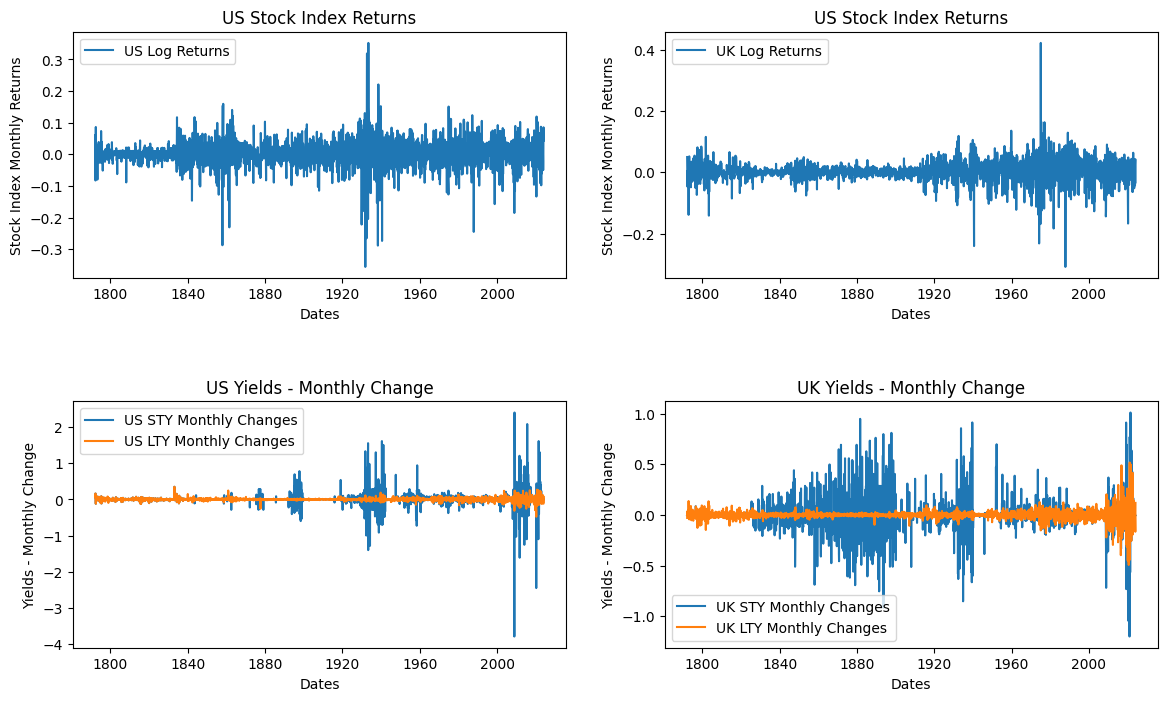

In [16]:
# Combined Visualization
fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharey=False, sharex=False)

# US Data on Left Hand Side
# Stock Index Returns
axs[0, 0].plot(us_data['Date'], us_data['Log Returns'], label='US Log Returns')
axs[0, 0].set_title("US Stock Index Returns")
axs[0, 0].set_xlabel("Dates")
axs[0, 0].set_ylabel("Stock Index Monthly Returns")
axs[0, 0].legend(loc='upper left')


# Short Term Yields and Long Term Yield Change
axs[1, 0].plot(us_data['Date'], us_data['ST Returns'], label='US STY Monthly Changes')
axs[1, 0].plot(us_data['Date'], us_data['LT Returns'], label='US LTY Monthly Changes')
axs[1, 0].set_title('US Yields - Monthly Change')
axs[1, 0].set_xlabel('Dates')
axs[1, 0].set_ylabel('Yields - Monthly Change')
axs[1, 0].legend()


# UK Data on Right Hand Side
axs[0, 1].plot(uk_data['Date'], uk_data['Log Returns'], label='UK Log Returns')
axs[0, 1].set_title("US Stock Index Returns")
axs[0, 1].set_xlabel("Dates")
axs[0, 1].set_ylabel("Stock Index Monthly Returns")
axs[0, 1].legend(loc='upper left')


# Short Term Yields and Long Term Yield Change
axs[1, 1].plot(uk_data['Date'], uk_data['ST Returns'], label='UK STY Monthly Changes')
axs[1, 1].plot(uk_data['Date'], uk_data['LT Returns'], label='UK LTY Monthly Changes')
axs[1, 1].set_title('UK Yields - Monthly Change')
axs[1, 1].set_xlabel('Dates')
axs[1, 1].set_ylabel('Yields - Monthly Change')
axs[1, 1].legend()


plt.subplots_adjust(hspace=0.5)

filename = os.path.join(directory, 'us_uk_stationary_data.png')
plt.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()

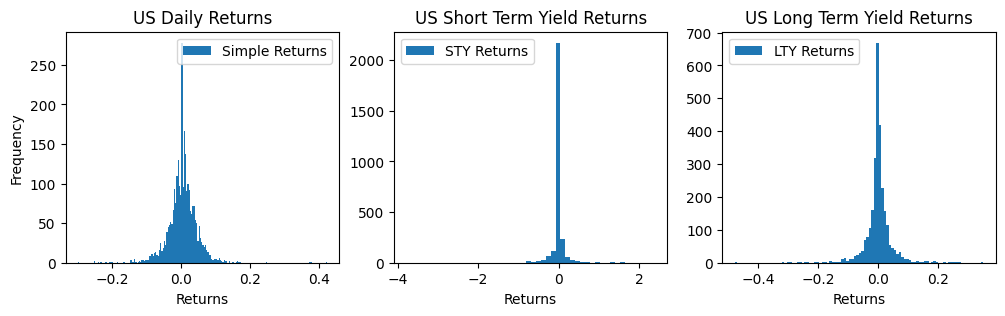

In [17]:
# Histogram of Returns - US
fig, axs = plt.subplots(1, 3, figsize=(12, 3), sharey=False, sharex=False)  # Adjust the figsize to fit your screen

# First Plot - Stock Returns
axs[0].hist(us_data['Simple Returns'], bins=200,  label='Simple Returns')
axs[0].set_xlabel('Returns')
axs[0].set_ylabel('Frequency')
axs[0].set_title('US Daily Returns')
axs[0].legend()

# Second Plot - STY Returns
axs[1].hist(us_data['ST Returns'], bins=50, label='STY Returns')
axs[1].set_xlabel('Returns')
axs[1].set_title('US Short Term Yield Returns')
axs[1].legend()

# Third Plot - LTY Returns
axs[2].hist(us_data['LT Returns'], bins=100, label='LTY Returns')
axs[2].set_xlabel('Returns')
axs[2].set_title('US Long Term Yield Returns')
axs[2].legend()

plt.subplots_adjust(hspace=0.5)

filename = os.path.join(directory, 'us_data_distribution.png')
plt.savefig(filename, dpi=300, bbox_inches='tight')

## Auto-Correlation and Partial Auto-Correlation Analysis

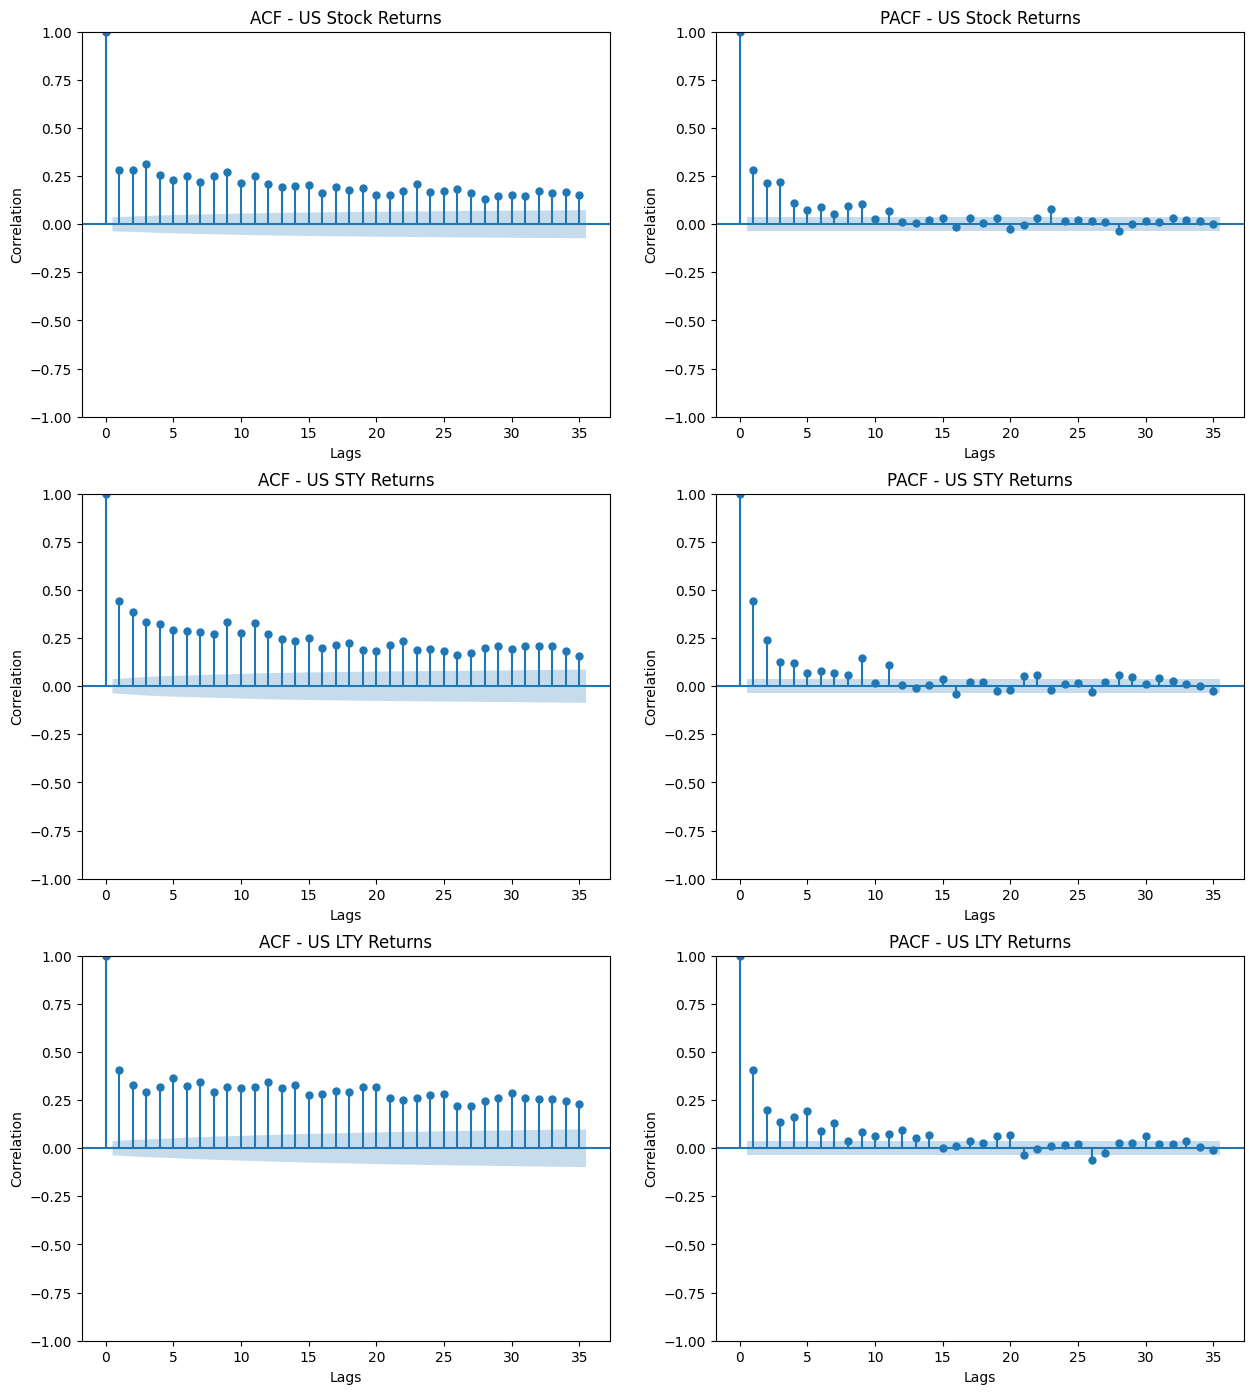

In [19]:
# Plot of Daily Returns - US
fig, axs = plt.subplots(3, 2, figsize=(15, 17), sharey=False, sharex=False)  # Adjust the figsize to fit your screen
lags = 35
# Stock Returns
plot_acf(abs(us_data['Simple Returns']), ax=axs[0, 0], lags=lags)
axs[0, 0].set_title('ACF - US Stock Returns')
axs[0, 0].set_ylabel('Correlation')
axs[0, 0].set_xlabel('Lags')
plot_pacf(abs(us_data['Simple Returns']), ax=axs[0, 1], lags=lags, method="ols")
axs[0, 1].set_title('PACF - US Stock Returns')
axs[0, 1].set_ylabel('Correlation')
axs[0, 1].set_xlabel('Lags')

#  STY Returns
plot_acf(abs(us_data['ST Returns']), ax=axs[1, 0], lags=lags)
axs[1, 0].set_title('ACF - US STY Returns')
axs[1, 0].set_ylabel('Correlation')
axs[1, 0].set_xlabel('Lags')
plot_pacf(abs(us_data['ST Returns']), ax=axs[1, 1], lags=lags, method="ols")
axs[1, 1].set_title('PACF - US STY Returns')
axs[1, 1].set_ylabel('Correlation')
axs[1, 1].set_xlabel('Lags')

#  LTY Returns
plot_acf(abs(us_data['LT Returns']), ax=axs[2, 0], lags=lags)
axs[2, 0].set_title('ACF - US LTY Returns')
axs[2, 0].set_ylabel('Correlation')
axs[2, 0].set_xlabel('Lags')
plot_pacf(abs(us_data['LT Returns']), ax=axs[2, 1], lags=lags, method="ols")
axs[2, 1].set_title('PACF - US LTY Returns')
axs[2, 1].set_ylabel('Correlation')
axs[2, 1].set_xlabel('Lags')

filename = os.path.join(directory, 'acf_pacf.png')
plt.savefig(filename, dpi=300, bbox_inches='tight')

## Estimate Parameters of Each Asset Class Model

In [249]:
def check_stationarity(series):
    
    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("Stationary")
    else:
        print("Non-stationary")

In [250]:
check_stationarity(us_data["Simple Returns"])

ADF Statistic: -11.642957
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Stationary


In [251]:
check_stationarity(us_data["ST Returns"])

ADF Statistic: -10.635594
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Stationary


In [252]:
check_stationarity(us_data["LT Returns"])

ADF Statistic: -12.688955
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Stationary


In [253]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [254]:
# Fit an MA(1) model
model_stock = ARIMA(us_data['Simple Returns'], order=(0, 0, 1))
model_stock_fit = model_stock.fit()

# Print out the summary of the fitted model
print(model_stock_fit.summary())

/Users/talhajamal/.pyenv/versions/3.11.3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/talhajamal/.pyenv/versions/3.11.3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/talhajamal/.pyenv/versions/3.11.3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         Simple Returns   No. Observations:                 2782
Model:                 ARIMA(0, 0, 1)   Log Likelihood                4814.452
Date:                Thu, 08 Feb 2024   AIC                          -9622.904
Time:                        00:09:15   BIC                          -9605.111
Sample:                             0   HQIC                         -9616.479
                               - 2782                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0037      0.001      4.087      0.000       0.002       0.005
ma.L1          0.1129      0.010     11.832      0.000       0.094       0.132
sigma2         0.0018   2.09e-05     88.133      0.0

In [255]:
# Get the residuals
residuals = model_stock_fit.resid

# Perform the Ljung-Box test
ljung_box_results = acorr_ljungbox(residuals, lags=[1], return_df=True) # 'k' is the number of lags

# The returned DataFrame contains two columns: 'lb_stat' and 'lb_pvalue'
# 'lb_stat' is the test statistic and 'lb_pvalue' is the p-value for the test
ljung_box_results

,lb_stat,lb_pvalue
1,0.002596,0.959365


In [256]:
# Fit an MA(1) model
model_sty = ARIMA(us_data['Simple Returns'], order=(3, 0, 0))
model_sty_fit = model_sty.fit()

# Print out the summary of the fitted model
print(model_sty_fit.summary())


/Users/talhajamal/.pyenv/versions/3.11.3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/talhajamal/.pyenv/versions/3.11.3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/talhajamal/.pyenv/versions/3.11.3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         Simple Returns   No. Observations:                 2782
Model:                 ARIMA(3, 0, 0)   Log Likelihood                4816.051
Date:                Thu, 08 Feb 2024   AIC                          -9622.103
Time:                        00:09:15   BIC                          -9592.448
Sample:                             0   HQIC                         -9611.395
                               - 2782                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0037      0.001      4.197      0.000       0.002       0.005
ar.L1          0.1128      0.010     11.558      0.000       0.094       0.132
ar.L2         -0.0344      0.010     -3.297      0.0

In [257]:
# Get the residuals
residuals = model_sty_fit.resid

# Perform the Ljung-Box test
ljung_box_results = acorr_ljungbox(residuals, lags=[3], return_df=True) # 'k' is the number of lags

# The returned DataFrame contains two columns: 'lb_stat' and 'lb_pvalue'
# 'lb_stat' is the test statistic and 'lb_pvalue' is the p-value for the test
ljung_box_results

,lb_stat,lb_pvalue
3,0.032573,0.998452


In [258]:
model_lty = ARIMA(us_data['LT Returns'], order=(1, 0, 1))
model_lty_fit = model_lty.fit()

# Print out the summary of the fitted model
print(model_lty_fit.summary())


/Users/talhajamal/.pyenv/versions/3.11.3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/talhajamal/.pyenv/versions/3.11.3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/talhajamal/.pyenv/versions/3.11.3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             LT Returns   No. Observations:                 2782
Model:                 ARIMA(1, 0, 1)   Log Likelihood                4816.896
Date:                Thu, 08 Feb 2024   AIC                          -9625.792
Time:                        00:09:16   BIC                          -9602.068
Sample:                             0   HQIC                         -9617.226
                               - 2782                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.287e-05      0.001      0.026      0.979      -0.002       0.002
ar.L1         -0.3087      0.079     -3.915      0.000      -0.463      -0.154
ma.L1          0.3980      0.078      5.123      0.0

In [259]:
# Get the residuals
residuals = model_lty_fit.resid

# Perform the Ljung-Box test
ljung_box_results = acorr_ljungbox(residuals, lags=[1], return_df=True) # 'k' is the number of lags

# The returned DataFrame contains two columns: 'lb_stat' and 'lb_pvalue'
# 'lb_stat' is the test statistic and 'lb_pvalue' is the p-value for the test
ljung_box_results

,lb_stat,lb_pvalue
1,0.015906,0.899637
